In [1]:
import numpy as np
import tensorflow

c:\Users\Jyoti Thakre\Desktop\Machine Learning\env\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\Jyoti Thakre\Desktop\Machine Learning\env\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\Jyoti Thakre\Desktop\Machine Learning\env\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/resource_

In [2]:
from tensorflow.keras.datasets import fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

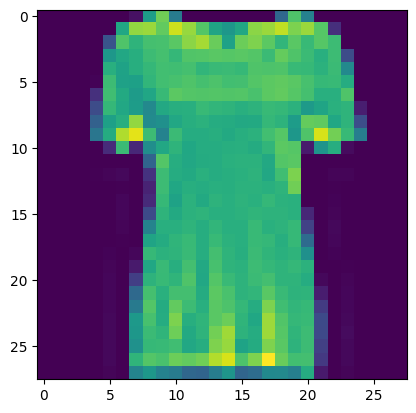

In [3]:
import matplotlib.pyplot as plt
for i in range(1,11):
    plt.imshow(x_train[i])

In [4]:
# Normalization

x_train = x_train/25
x_test = x_test/25

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,BatchNormalization

In [6]:
Model = Sequential()
Model.add(Conv2D(32,(3,3), activation= 'relu',input_shape = (28,28,1)))
Model.add(BatchNormalization())
Model.add(MaxPooling2D((2,2)))
# Hidden layer 1
Model.add(Conv2D(64,(3,3),activation = 'relu'))
Model.add(BatchNormalization())
Model.add(MaxPooling2D((2,2)))
# FLatten layer
Model.add(Flatten())
# Fully connected layer
Model.add(Dense(128,activation = 'relu'))
# Output Layer
Model.add(Dense(10,activation = 'softmax'))


c:\Users\Jyoti Thakre\Desktop\Machine Learning\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
Model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,418 (880.54 KB)

 Trainable params: 225,226 (879.79 KB)

 Non-trainable params: 192 (768.00 B)

In [8]:
Model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [9]:
from tensorflow.keras.callbacks import EarlyStopping
earlyStopping = EarlyStopping(monitor = 'val_accuracy',patience=5)

In [ ]:
history = Model.fit(x_train,y_train,
                    epochs = 25,
                    validation_data = (x_test,y_test),
                    callbacks = [earlyStopping])

Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9034 - loss: 0.2573 - val_accuracy: 0.8958 - val_loss: 0.2901
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9187 - loss: 0.2163 - val_accuracy: 0.8905 - val_loss: 0.2898
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9296 - loss: 0.1880 - val_accuracy: 0.8985 - val_loss: 0.3046
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9384 - loss: 0.1633 - val_accuracy: 0.8771 - val_loss: 0.3715
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 32ms/step - accuracy: 0.9475 - loss: 0.1389 - val_accuracy: 0.8873 - val_loss: 0.3388
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 33ms/step - accuracy: 0.9542 - loss: 0.1218 - val_accuracy: 0.8981 - val_loss: 0.3408
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 156s 83ms/step - accuracy: 0.9597 - loss: 0.1073 - val_accuracy: 0.8905 - val_loss: 0.3817
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 37ms/step - accuracy: 0.9638 

In [ ]:
plt.figure(figsize = (4,3))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.show()

In [ ]:
import  cv2 as cv
